# LENET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation


2.15.1


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [5]:
MODEL=Sequential()
MODEL.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3), input_shape=(224,224,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(3,3), padding=('valid'), activation='relu'))
MODEL.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
MODEL.add(Flatten())
MODEL.add(Dense(256, activation='relu'))
MODEL.add(Dense(10, activation='softmax'))

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
MODEL.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)              

In [6]:
model_path = "LENET.h5"

from tensorflow.keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [7]:
epochs = 150
batch_size = 32

In [8]:
WORKING = MODEL.fit_generator(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/150


62/62 [==============================] - ETA: 0s - loss: 2.2616 - accuracy: 0.1540 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1: accuracy improved from -inf to 0.15396, saving model to LENET.h5
62/62 [==============================] - 26s 401ms/step - loss: 2.2616 - accuracy: 0.1540 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1385 - val_accuracy: 0.1915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
62/62 [==============================] - ETA: 0s - loss: 2.0889 - accuracy: 0.2266 - precision: 0.6667 - recall: 0.0030
Epoch 2: accuracy improved from 0.15396 to 0.22663, saving model to LENET.h5
62/62 [==============================] - 20s 330ms/step - loss: 2.0889 - accuracy: 0.2266 - precision: 0.6667 - recall: 0.0030 - val_loss: 1.9715 - val_accuracy: 0.3070 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
62/62 [==============================] - ETA: 0s - loss: 1.9402 - accuracy: 0.3069 - precision: 0.5833 - recall

62/62 [==============================] - ETA: 0s - loss: 1.2662 - accuracy: 0.5686 - precision: 0.7617 - recall: 0.3542
Epoch 19: accuracy improved from 0.53862 to 0.56860, saving model to LENET.h5
62/62 [==============================] - 20s 328ms/step - loss: 1.2662 - accuracy: 0.5686 - precision: 0.7617 - recall: 0.3542 - val_loss: 1.1222 - val_accuracy: 0.6013 - val_precision: 0.7831 - val_recall: 0.4294
Epoch 20/150
62/62 [==============================] - ETA: 0s - loss: 1.2109 - accuracy: 0.5935 - precision: 0.7575 - recall: 0.3826
Epoch 20: accuracy improved from 0.56860 to 0.59350, saving model to LENET.h5
62/62 [==============================] - 20s 328ms/step - loss: 1.2109 - accuracy: 0.5935 - precision: 0.7575 - recall: 0.3826 - val_loss: 1.0615 - val_accuracy: 0.6436 - val_precision: 0.8108 - val_recall: 0.4602
Epoch 21/150
62/62 [==============================] - ETA: 0s - loss: 1.1897 - accuracy: 0.5991 - precision: 0.7664 - recall: 0.3968
Epoch 21: accuracy improved fr

Epoch 39/150
62/62 [==============================] - ETA: 0s - loss: 0.7111 - accuracy: 0.7566 - precision: 0.8446 - recall: 0.6712
Epoch 39: accuracy improved from 0.74543 to 0.75661, saving model to LENET.h5
62/62 [==============================] - 20s 328ms/step - loss: 0.7111 - accuracy: 0.7566 - precision: 0.8446 - recall: 0.6712 - val_loss: 0.5561 - val_accuracy: 0.8175 - val_precision: 0.8958 - val_recall: 0.7324
Epoch 40/150
62/62 [==============================] - ETA: 0s - loss: 0.7058 - accuracy: 0.7652 - precision: 0.8398 - recall: 0.6768
Epoch 40: accuracy improved from 0.75661 to 0.76524, saving model to LENET.h5
62/62 [==============================] - 20s 328ms/step - loss: 0.7058 - accuracy: 0.7652 - precision: 0.8398 - recall: 0.6768 - val_loss: 0.5764 - val_accuracy: 0.8180 - val_precision: 0.8867 - val_recall: 0.7298
Epoch 41/150
62/62 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.7591 - precision: 0.8338 - recall: 0.6728
Epoch 41: accurac

Epoch 59/150
62/62 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.8562 - precision: 0.8949 - recall: 0.8130
Epoch 59: accuracy did not improve from 0.86077
62/62 [==============================] - 20s 328ms/step - loss: 0.4464 - accuracy: 0.8562 - precision: 0.8949 - recall: 0.8130 - val_loss: 0.2715 - val_accuracy: 0.9138 - val_precision: 0.9410 - val_recall: 0.8846
Epoch 60/150
62/62 [==============================] - ETA: 0s - loss: 0.4242 - accuracy: 0.8572 - precision: 0.8872 - recall: 0.8196
Epoch 60: accuracy did not improve from 0.86077
62/62 [==============================] - 20s 327ms/step - loss: 0.4242 - accuracy: 0.8572 - precision: 0.8872 - recall: 0.8196 - val_loss: 0.2703 - val_accuracy: 0.9108 - val_precision: 0.9421 - val_recall: 0.8856
Epoch 61/150
62/62 [==============================] - ETA: 0s - loss: 0.3884 - accuracy: 0.8750 - precision: 0.9093 - recall: 0.8404
Epoch 61: accuracy improved from 0.86077 to 0.87500, saving model to LENET.h5

62/62 [==============================] - ETA: 0s - loss: 0.2810 - accuracy: 0.9106 - precision: 0.9271 - recall: 0.8918
Epoch 79: accuracy improved from 0.90549 to 0.91057, saving model to LENET.h5
62/62 [==============================] - 20s 328ms/step - loss: 0.2810 - accuracy: 0.9106 - precision: 0.9271 - recall: 0.8918 - val_loss: 0.1556 - val_accuracy: 0.9531 - val_precision: 0.9609 - val_recall: 0.9410
Epoch 80/150
62/62 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.9060 - precision: 0.9257 - recall: 0.8857
Epoch 80: accuracy did not improve from 0.91057
62/62 [==============================] - 20s 328ms/step - loss: 0.2634 - accuracy: 0.9060 - precision: 0.9257 - recall: 0.8857 - val_loss: 0.2098 - val_accuracy: 0.9315 - val_precision: 0.9510 - val_recall: 0.9194
Epoch 81/150
62/62 [==============================] - ETA: 0s - loss: 0.3032 - accuracy: 0.8968 - precision: 0.9161 - recall: 0.8770
Epoch 81: accuracy did not improve from 0.91057
62/62 [=====

62/62 [==============================] - 20s 330ms/step - loss: 0.2163 - accuracy: 0.9263 - precision: 0.9383 - recall: 0.9121 - val_loss: 0.0887 - val_accuracy: 0.9758 - val_precision: 0.9816 - val_recall: 0.9698
Epoch 100/150
62/62 [==============================] - ETA: 0s - loss: 0.1803 - accuracy: 0.9365 - precision: 0.9491 - recall: 0.9278
Epoch 100: accuracy did not improve from 0.94106
62/62 [==============================] - 20s 329ms/step - loss: 0.1803 - accuracy: 0.9365 - precision: 0.9491 - recall: 0.9278 - val_loss: 0.0820 - val_accuracy: 0.9778 - val_precision: 0.9832 - val_recall: 0.9728
Epoch 101/150
62/62 [==============================] - ETA: 0s - loss: 0.1604 - accuracy: 0.9482 - precision: 0.9575 - recall: 0.9390
Epoch 101: accuracy improved from 0.94106 to 0.94817, saving model to LENET.h5
62/62 [==============================] - 20s 330ms/step - loss: 0.1604 - accuracy: 0.9482 - precision: 0.9575 - recall: 0.9390 - val_loss: 0.0925 - val_accuracy: 0.9698 - val_p

Epoch 120/150
62/62 [==============================] - ETA: 0s - loss: 0.1715 - accuracy: 0.9441 - precision: 0.9500 - recall: 0.9360
Epoch 120: accuracy did not improve from 0.95681
62/62 [==============================] - 20s 328ms/step - loss: 0.1715 - accuracy: 0.9441 - precision: 0.9500 - recall: 0.9360 - val_loss: 0.1220 - val_accuracy: 0.9582 - val_precision: 0.9633 - val_recall: 0.9516
Epoch 121/150
62/62 [==============================] - ETA: 0s - loss: 0.1920 - accuracy: 0.9345 - precision: 0.9418 - recall: 0.9294
Epoch 121: accuracy did not improve from 0.95681
62/62 [==============================] - 23s 366ms/step - loss: 0.1920 - accuracy: 0.9345 - precision: 0.9418 - recall: 0.9294 - val_loss: 0.0708 - val_accuracy: 0.9798 - val_precision: 0.9818 - val_recall: 0.9778
Epoch 122/150
62/62 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9533 - precision: 0.9604 - recall: 0.9487
Epoch 122: accuracy did not improve from 0.95681
62/62 [================

62/62 [==============================] - 20s 327ms/step - loss: 0.1156 - accuracy: 0.9609 - precision: 0.9661 - recall: 0.9568 - val_loss: 0.0548 - val_accuracy: 0.9819 - val_precision: 0.9858 - val_recall: 0.9793
Epoch 141/150
62/62 [==============================] - ETA: 0s - loss: 0.1085 - accuracy: 0.9599 - precision: 0.9661 - recall: 0.9553
Epoch 141: accuracy did not improve from 0.96697
62/62 [==============================] - 20s 326ms/step - loss: 0.1085 - accuracy: 0.9599 - precision: 0.9661 - recall: 0.9553 - val_loss: 0.0372 - val_accuracy: 0.9904 - val_precision: 0.9904 - val_recall: 0.9894
Epoch 142/150
62/62 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.9390 - precision: 0.9479 - recall: 0.9345
Epoch 142: accuracy did not improve from 0.96697
62/62 [==============================] - 20s 326ms/step - loss: 0.1718 - accuracy: 0.9390 - precision: 0.9479 - recall: 0.9345 - val_loss: 0.0705 - val_accuracy: 0.9768 - val_precision: 0.9772 - val_recall:

In [9]:
WORKING.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

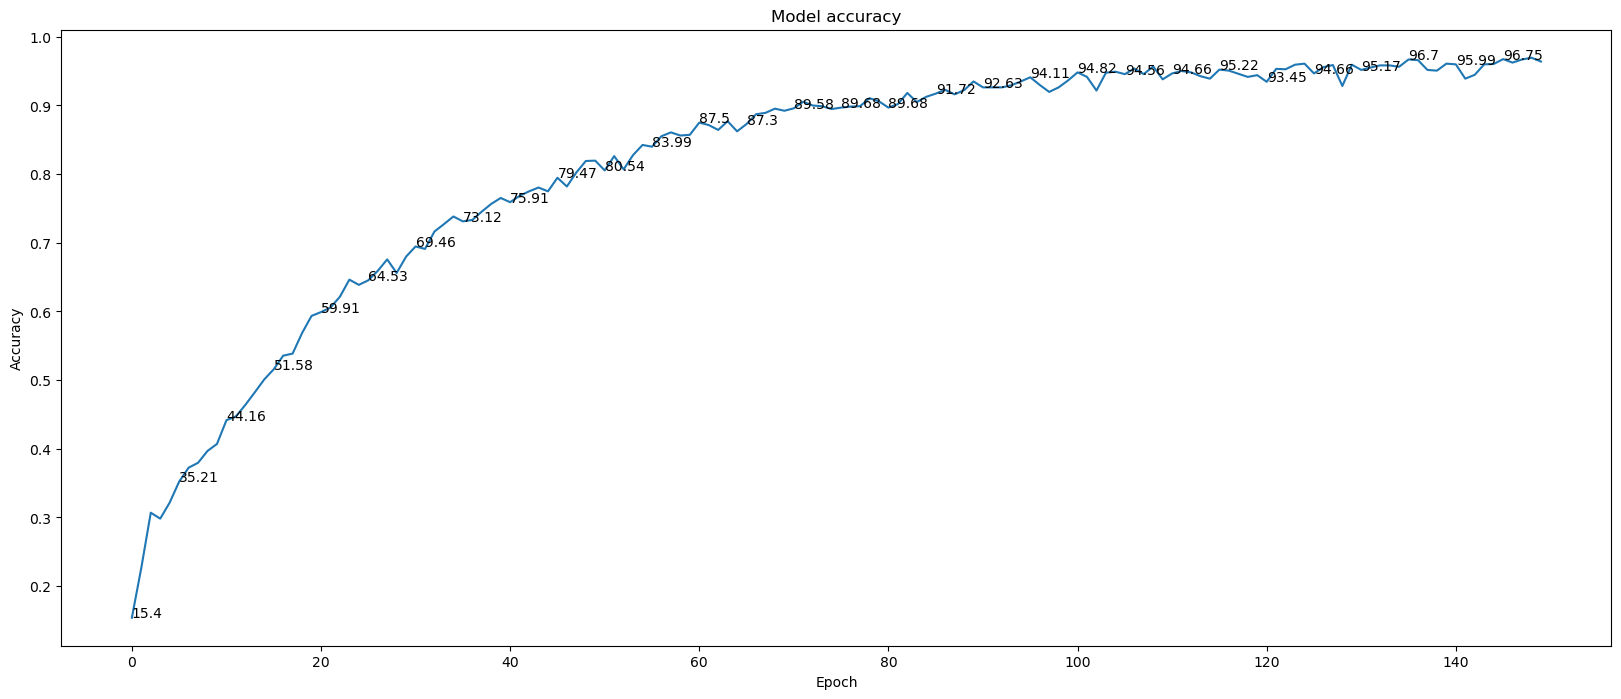

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['accuracy'][i]*100,2),xy=(i,WORKING.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

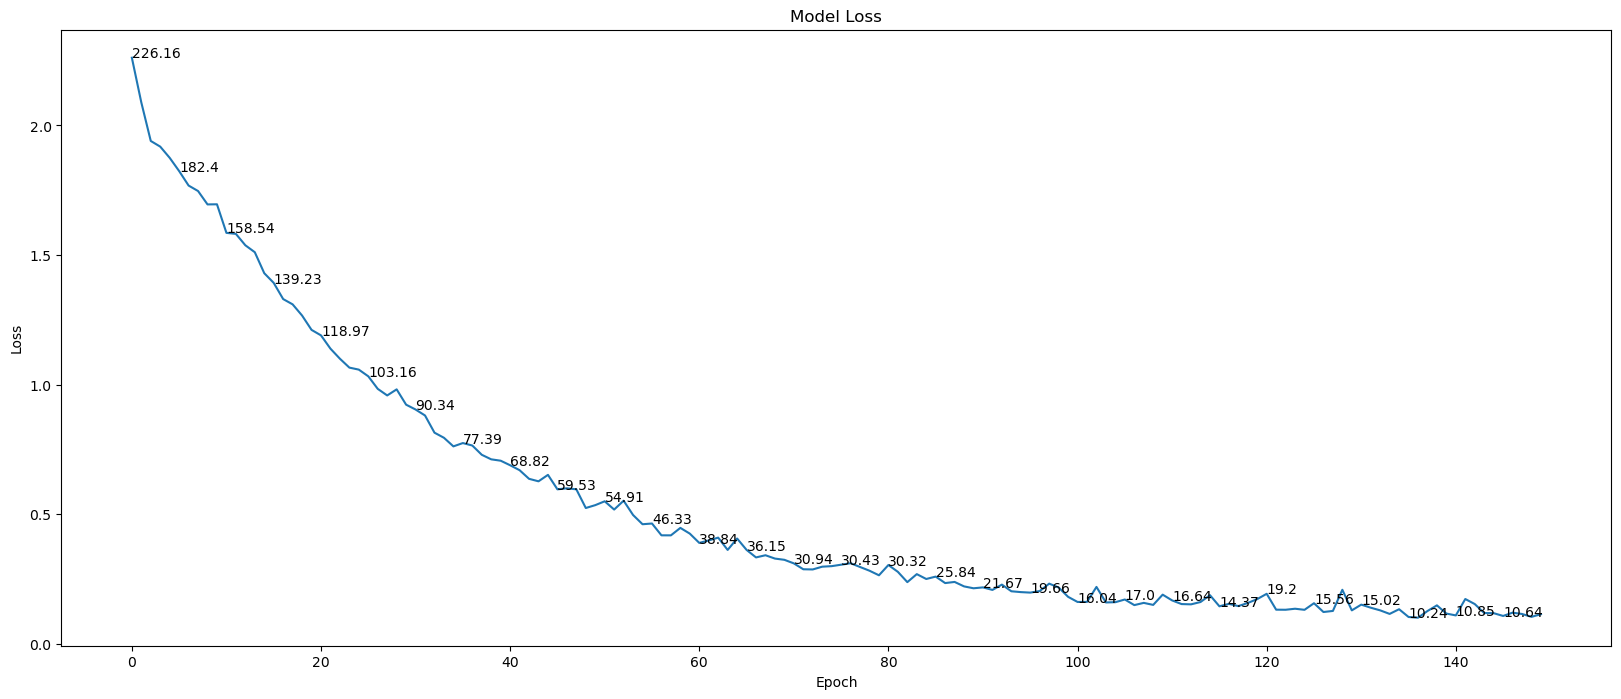

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(WORKING.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(WORKING.history['loss'][i]*100,2),xy=(i,WORKING.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()